<div style="background-color:#b5add6; padding: 1em; color: black;">
    DAH - Week2, Lab2
</div>

we will explore how to build a Docker container using GitHub Actions. GitHub Actions will be used to automate the container building process.

#### Prerequisites:
1. A GitHub account
2. Docker Hub account

#### URL
* <a href="https://github.com">https://github.com</a>
* <a href="https://hub.docker.com/">https://hub.docker.com/</a>

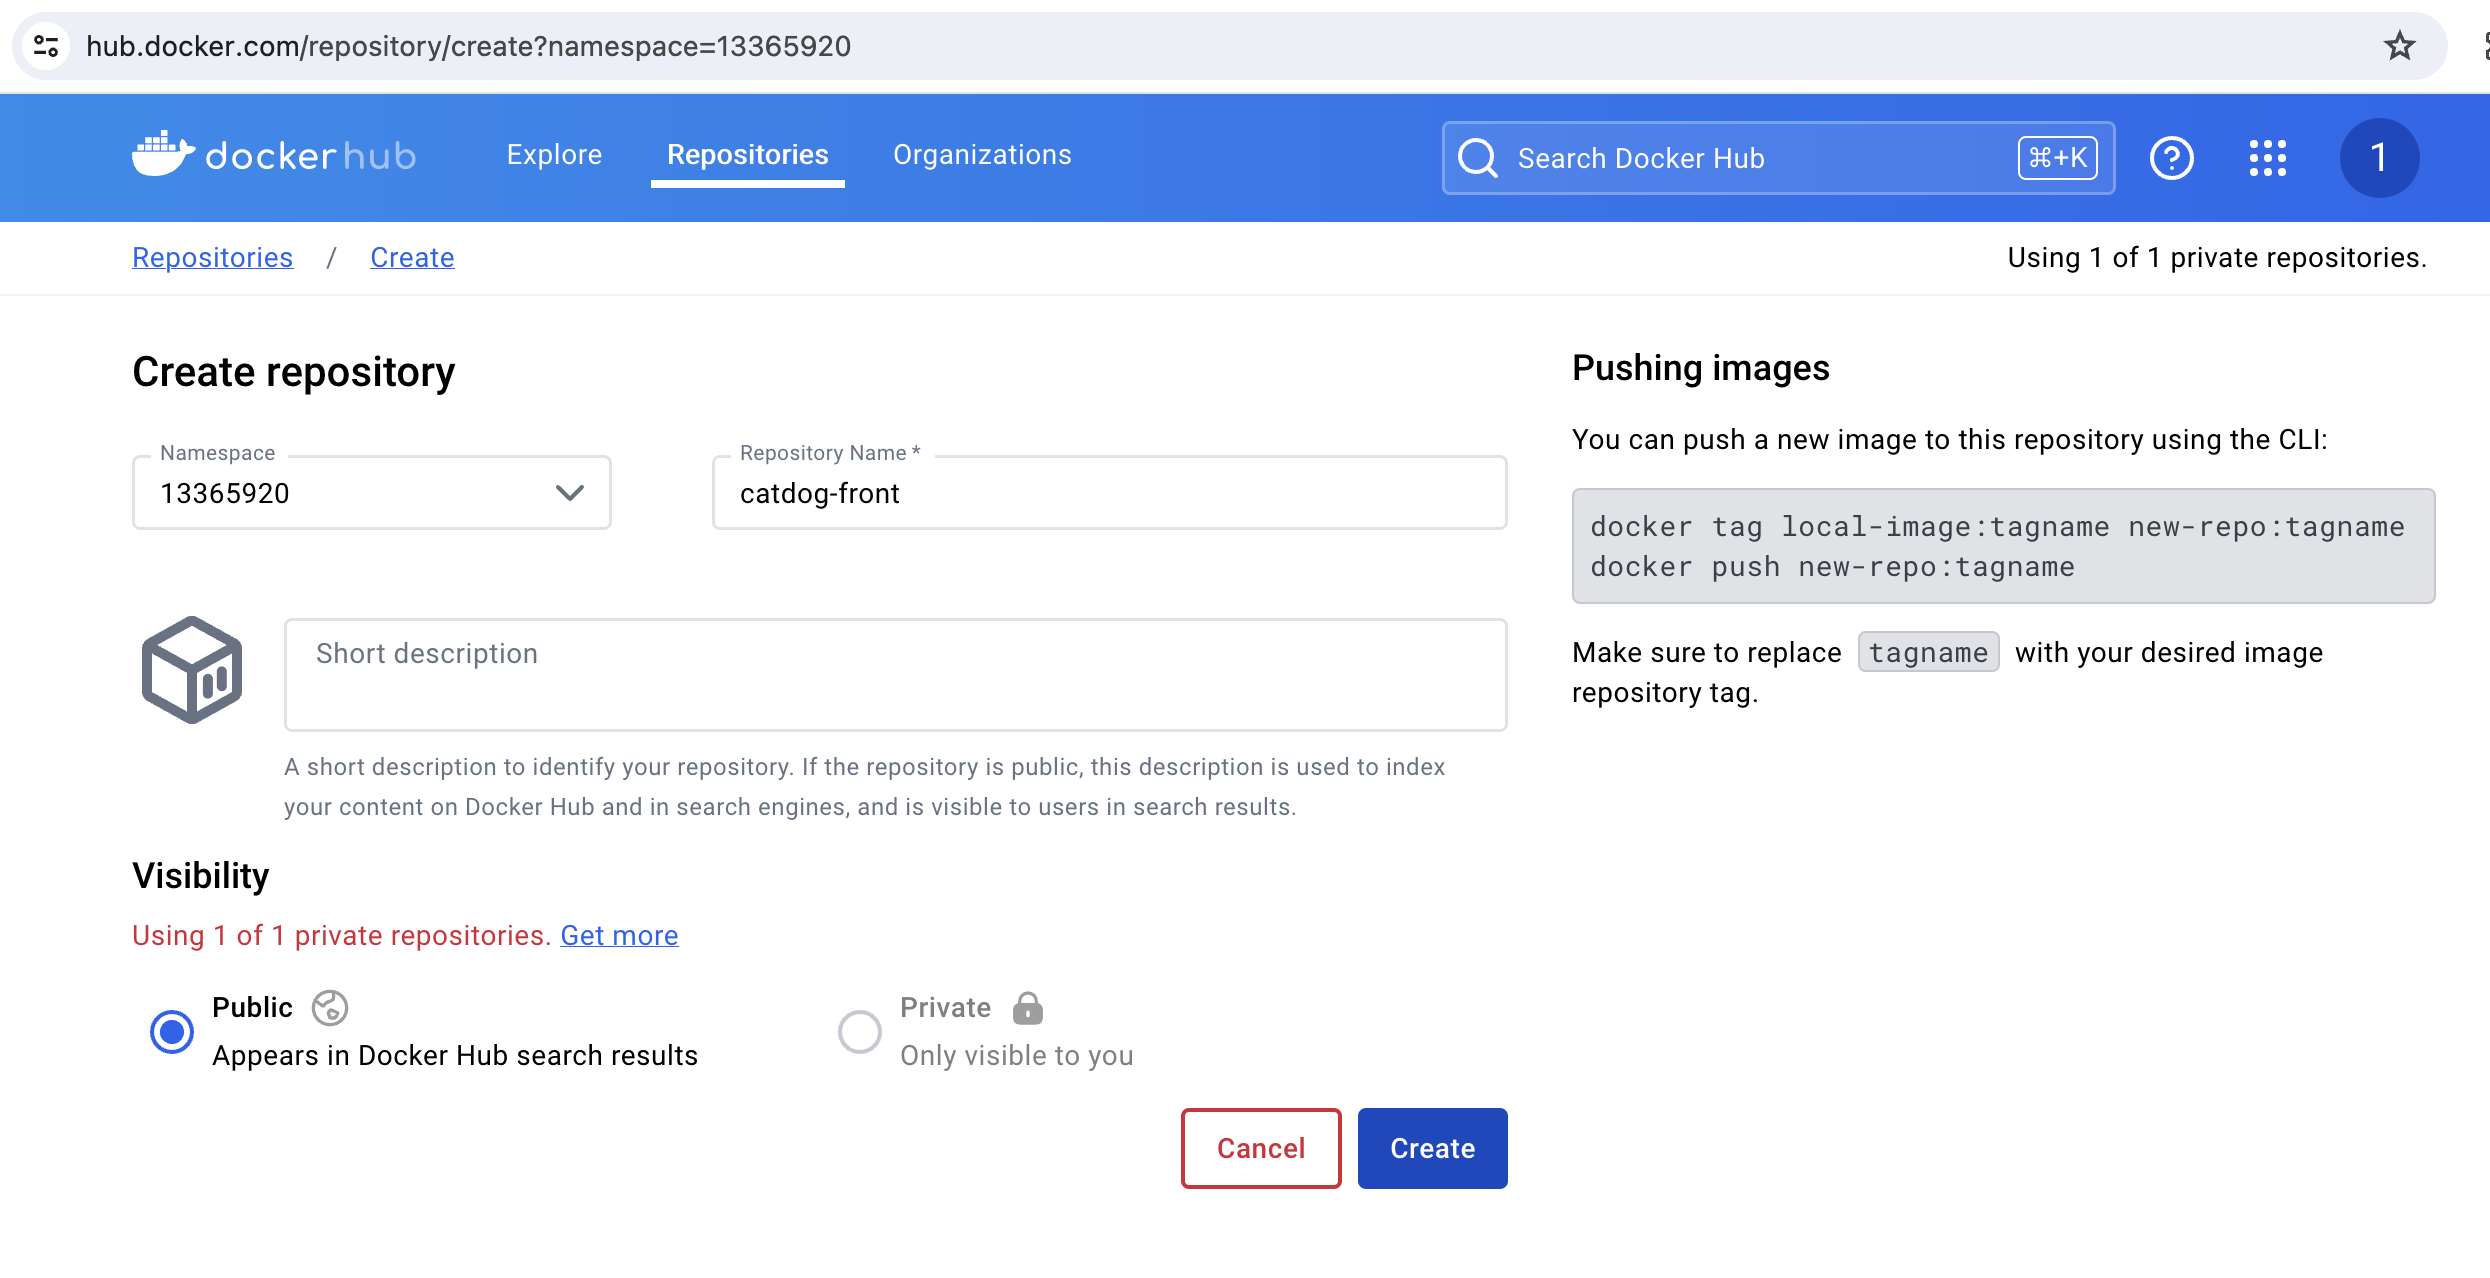

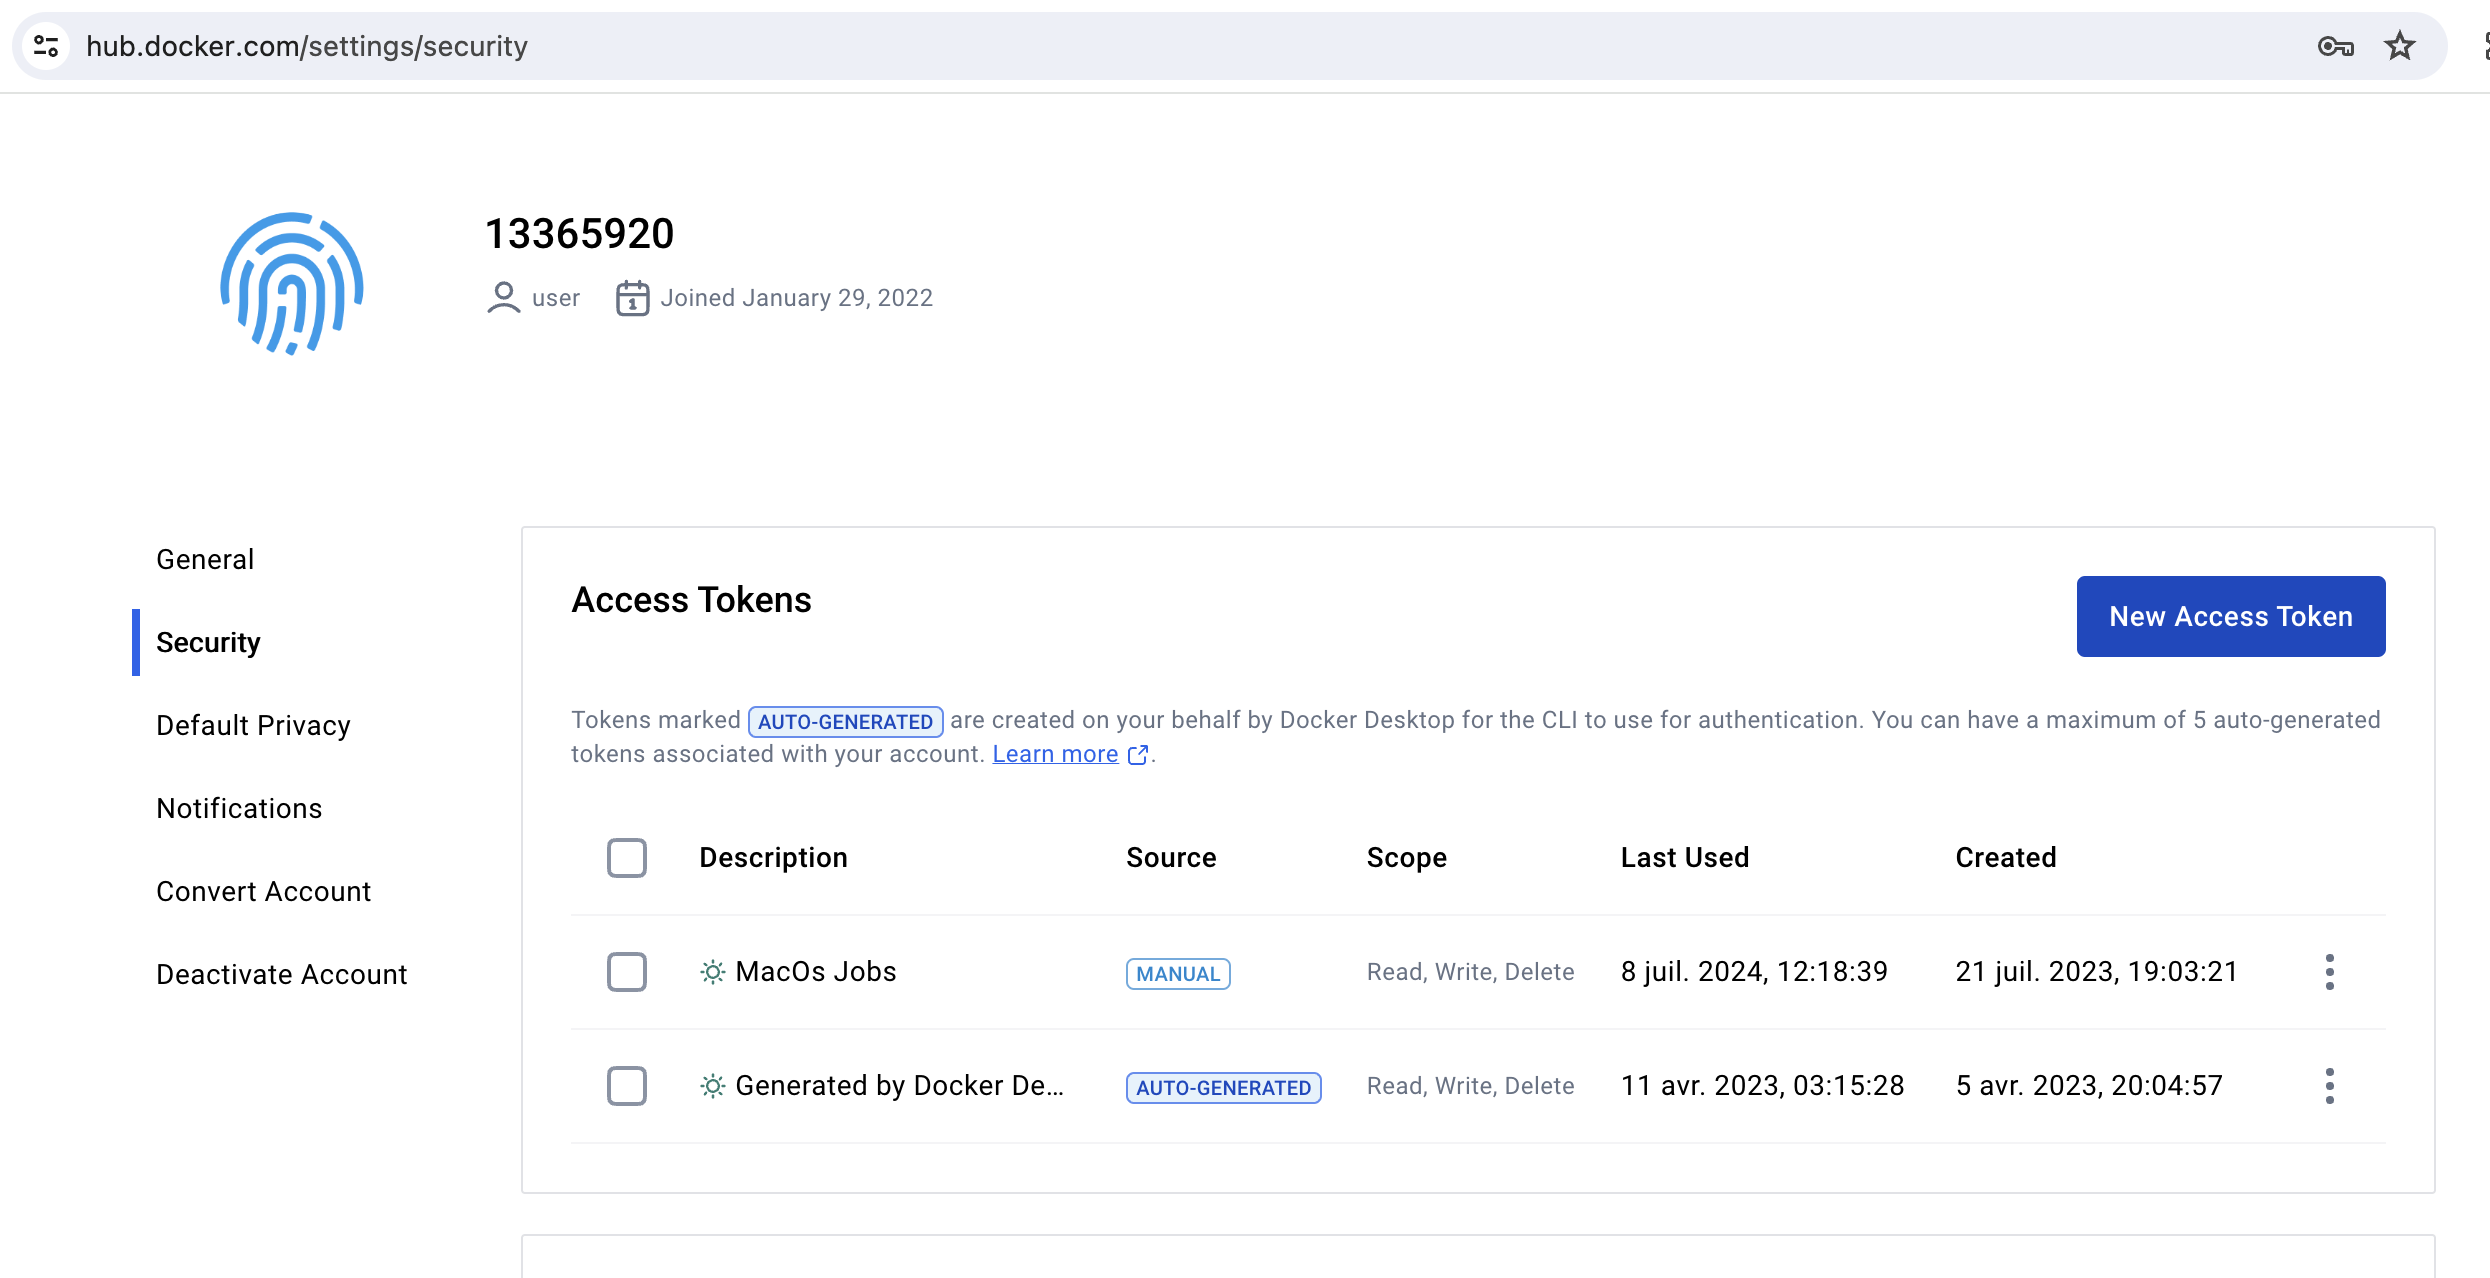

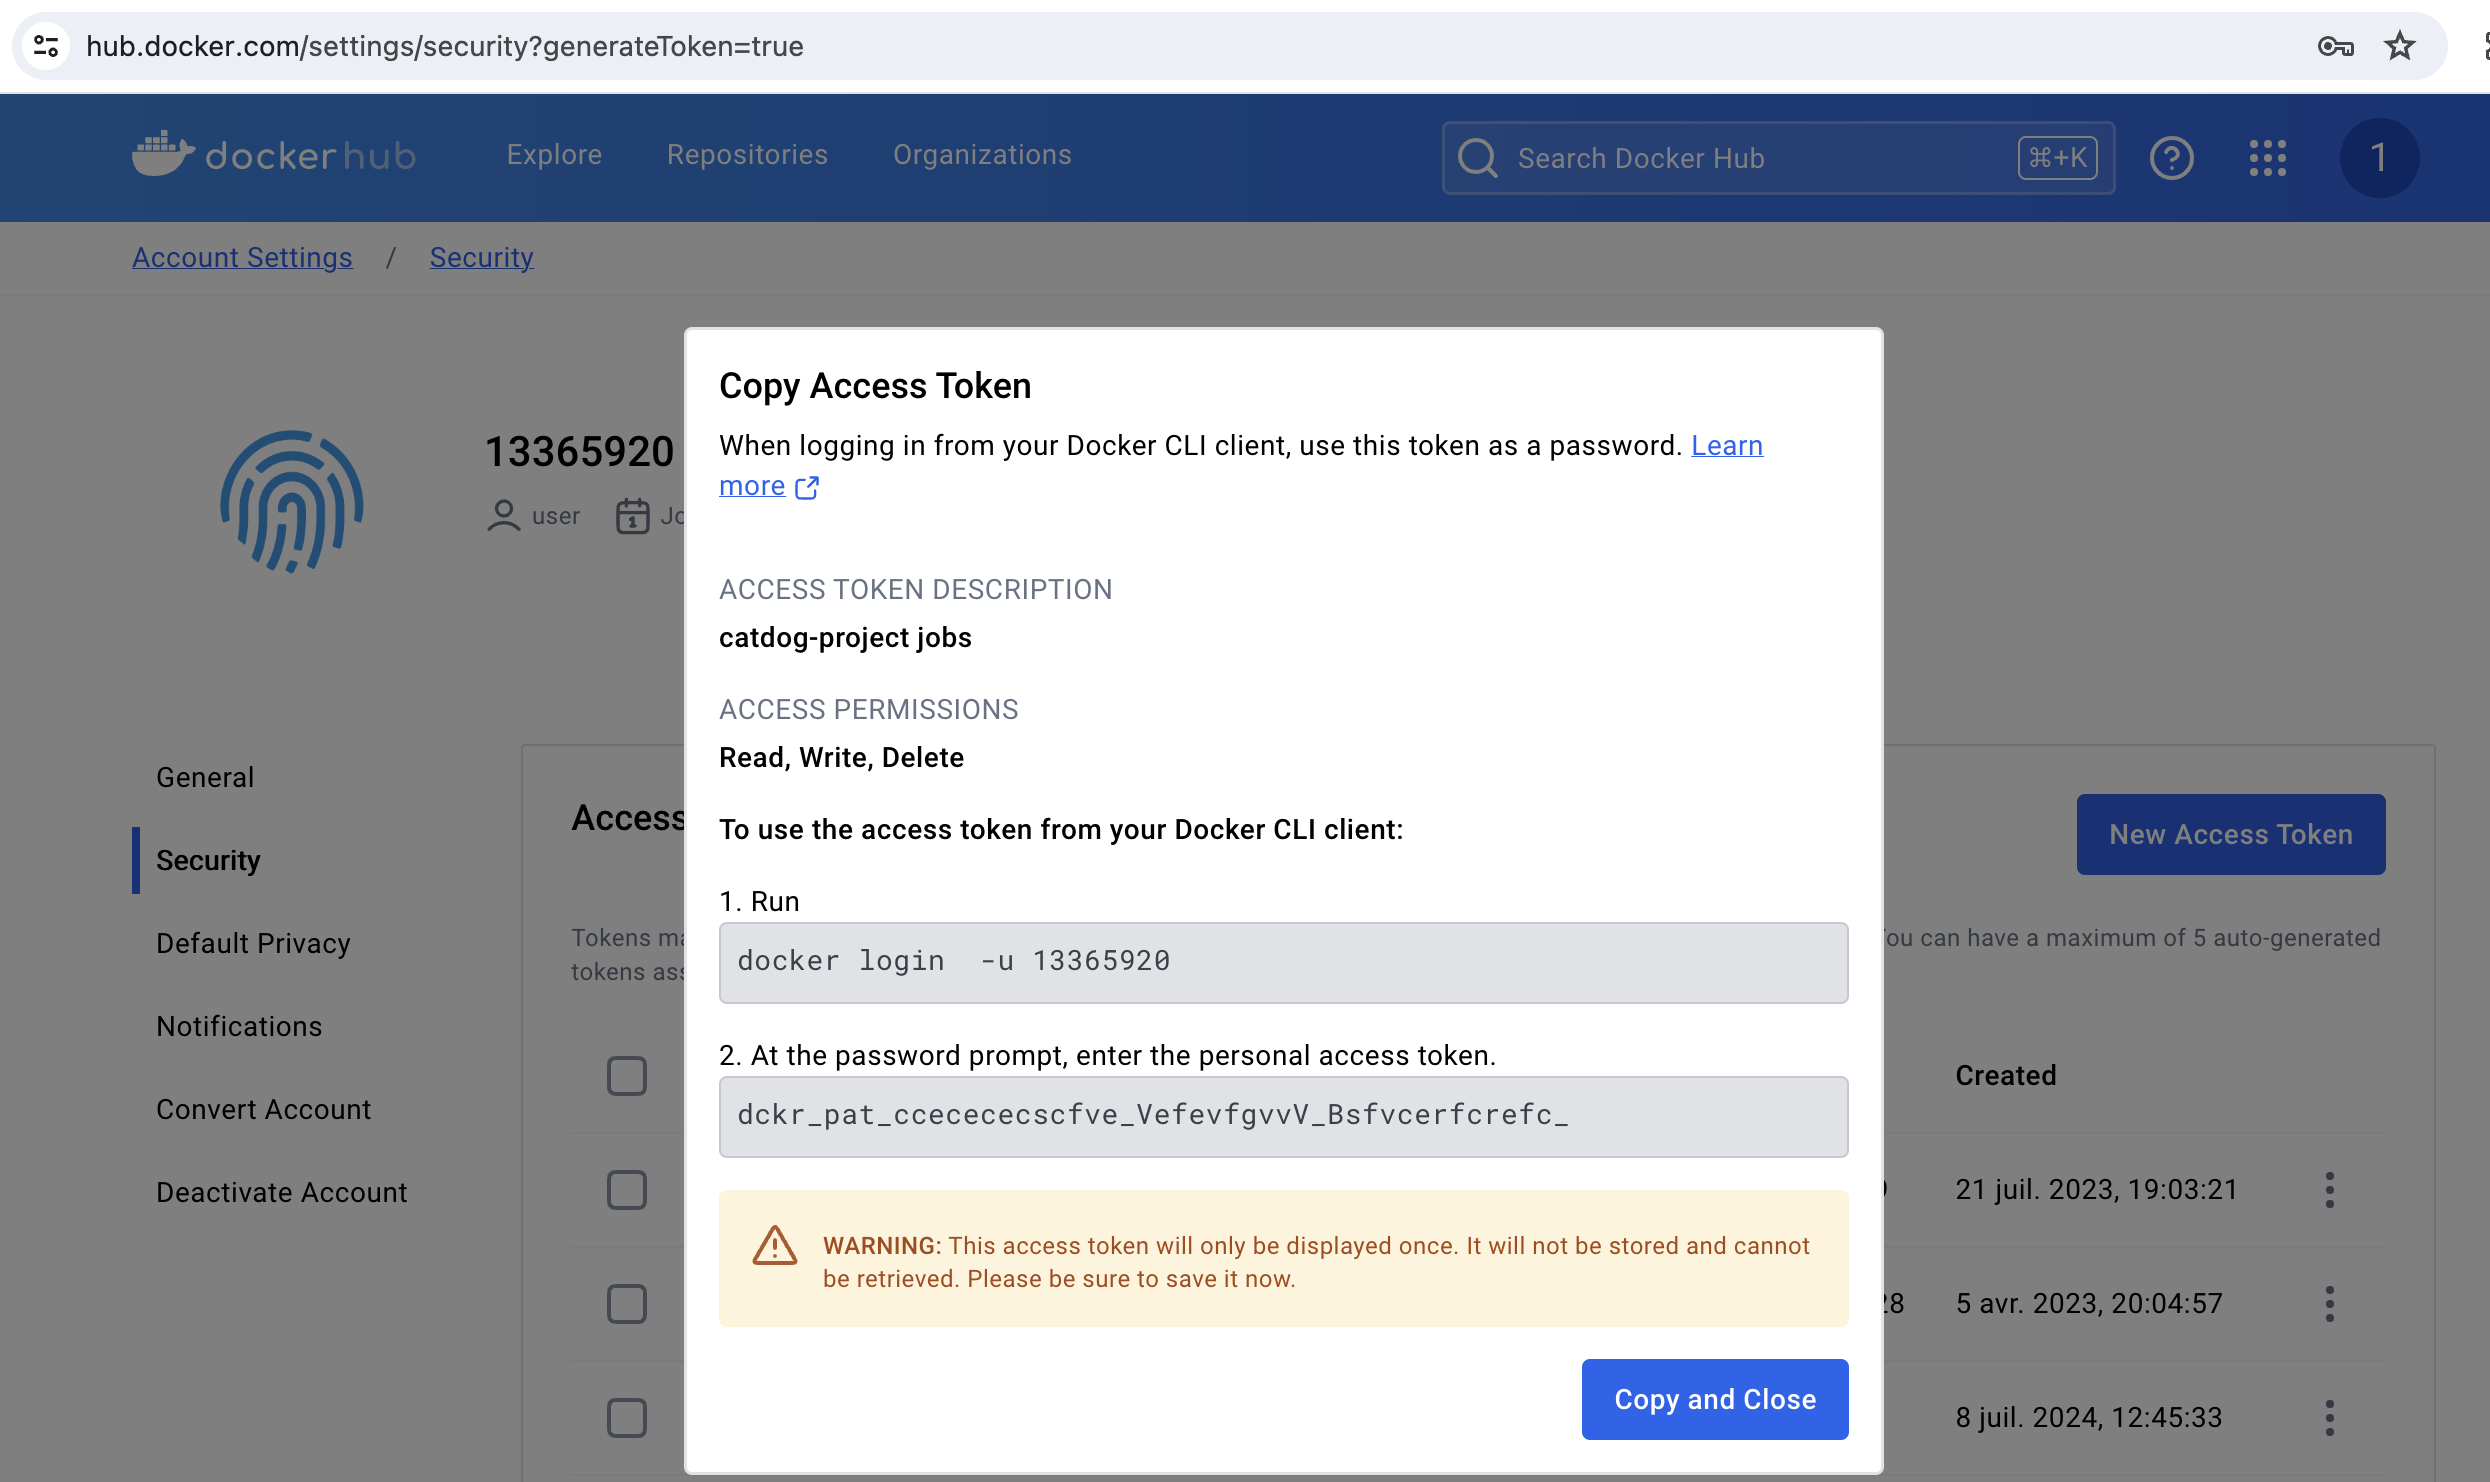

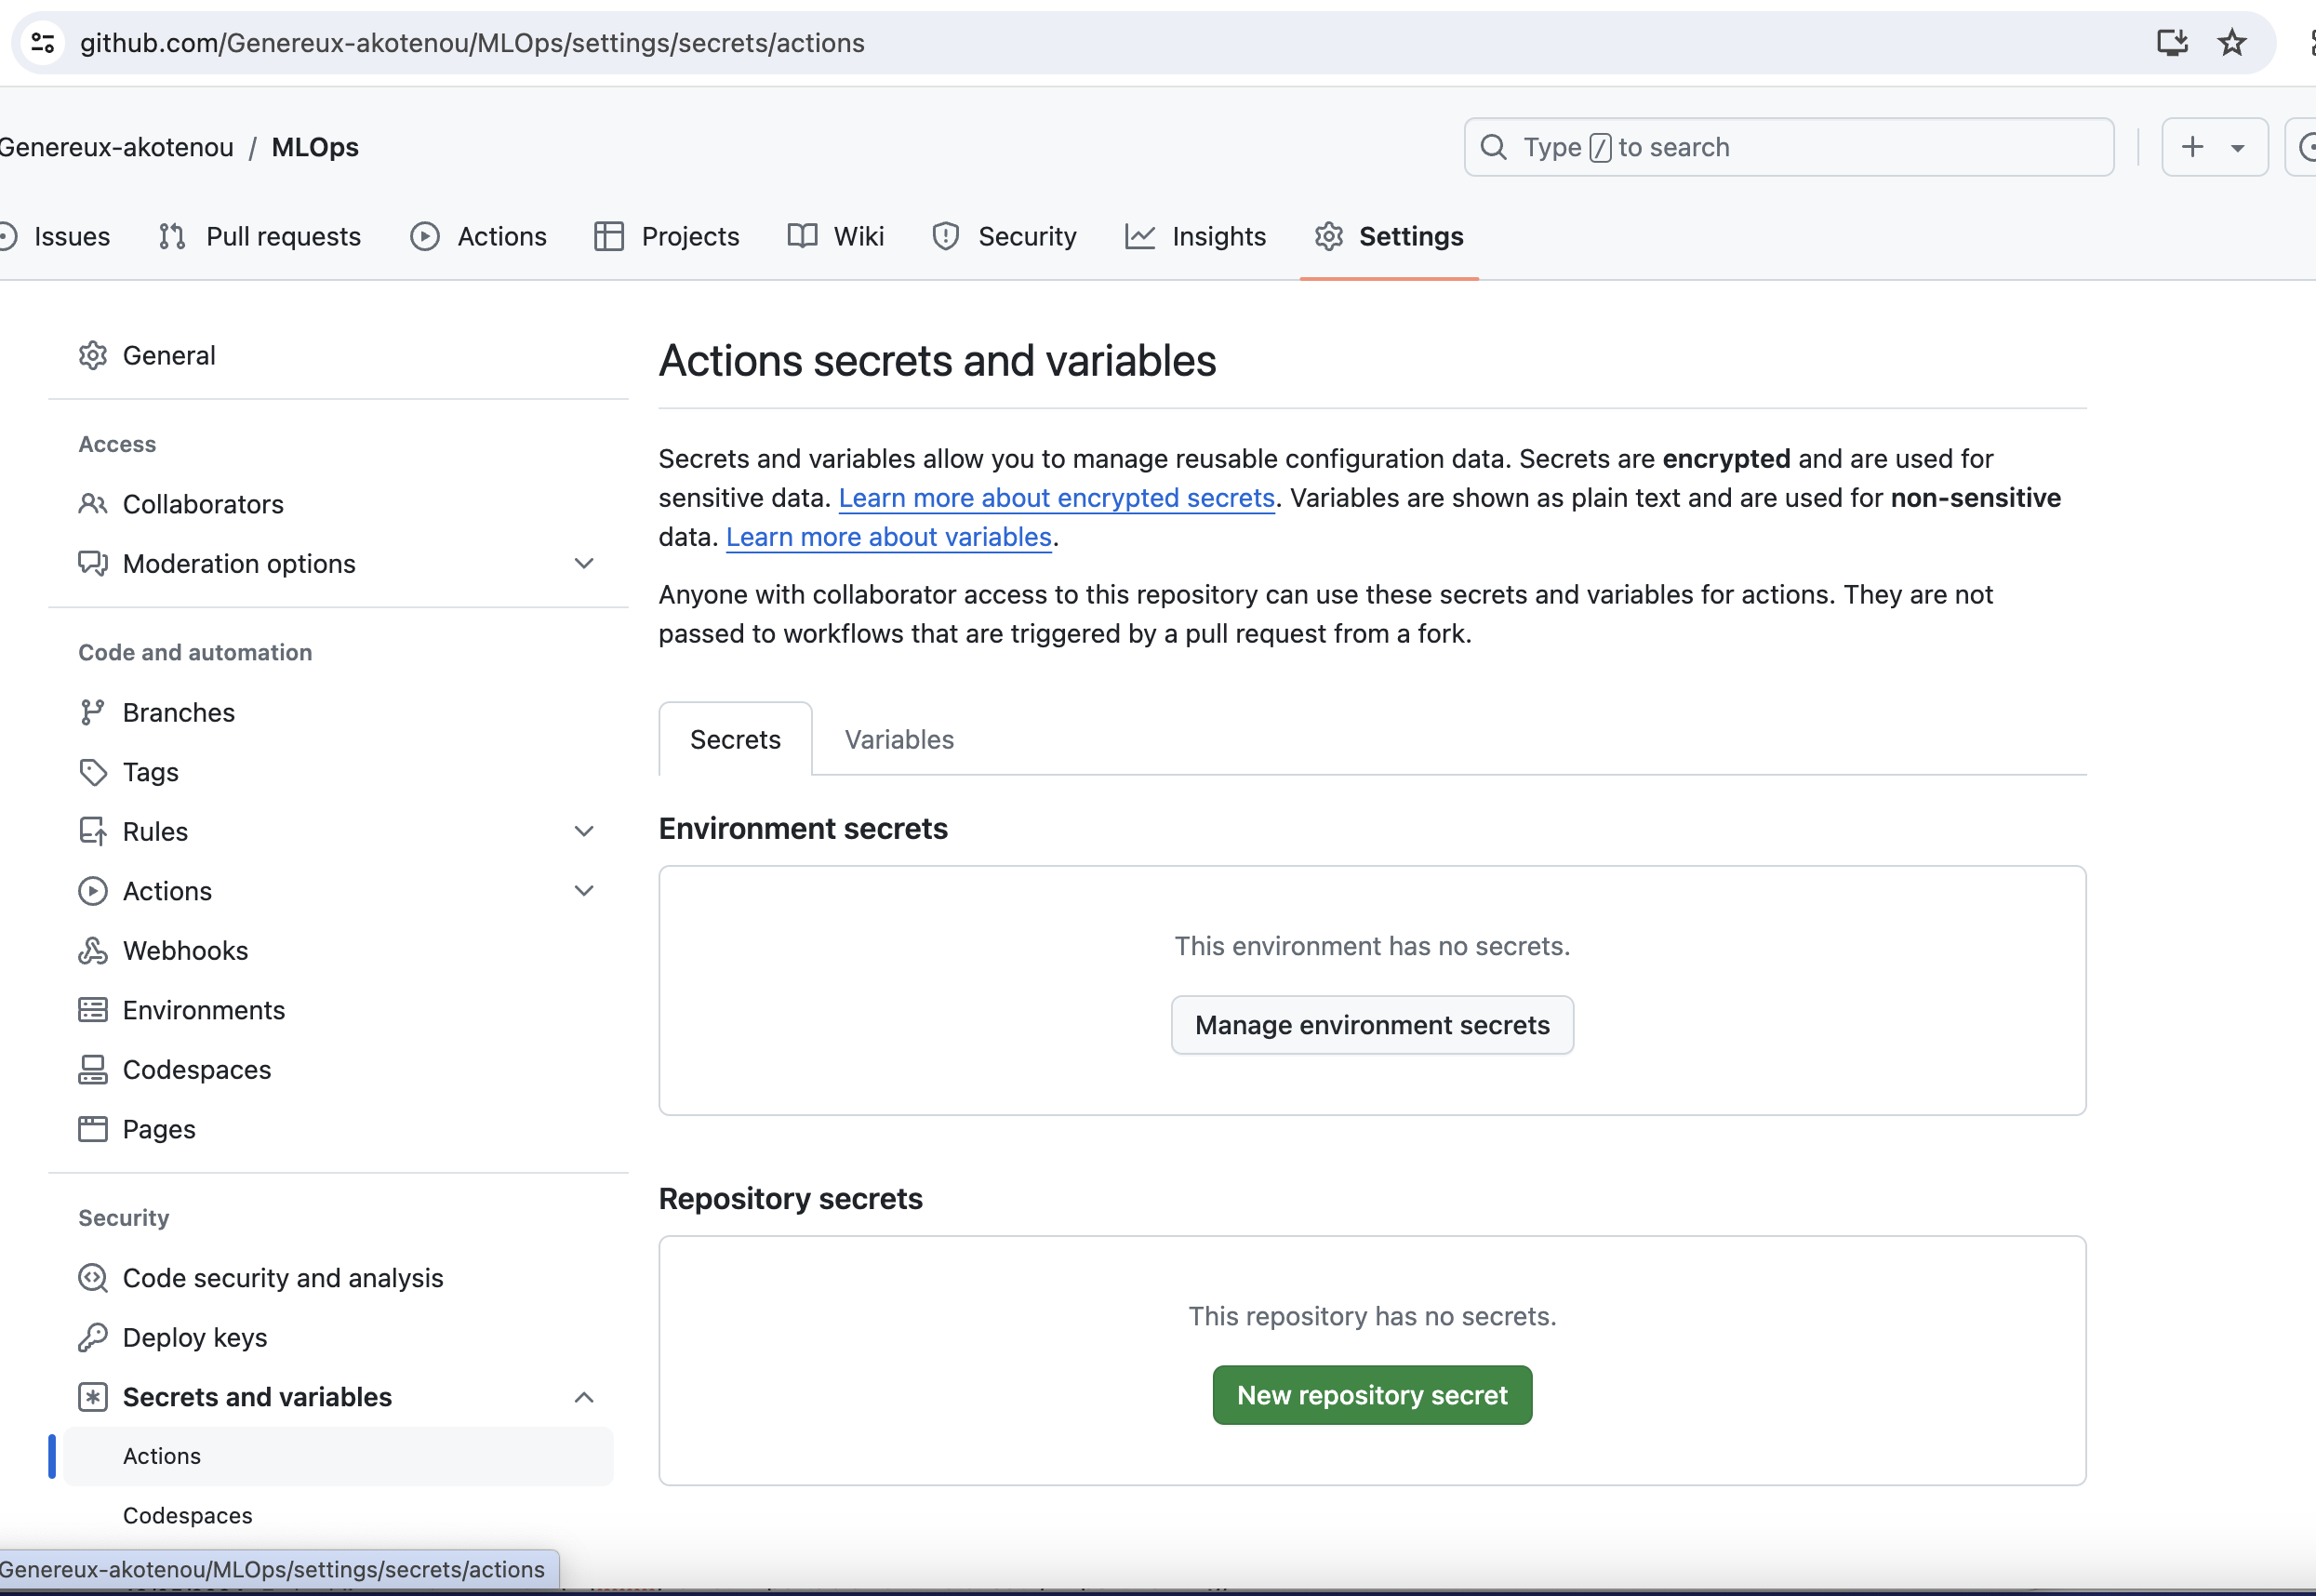

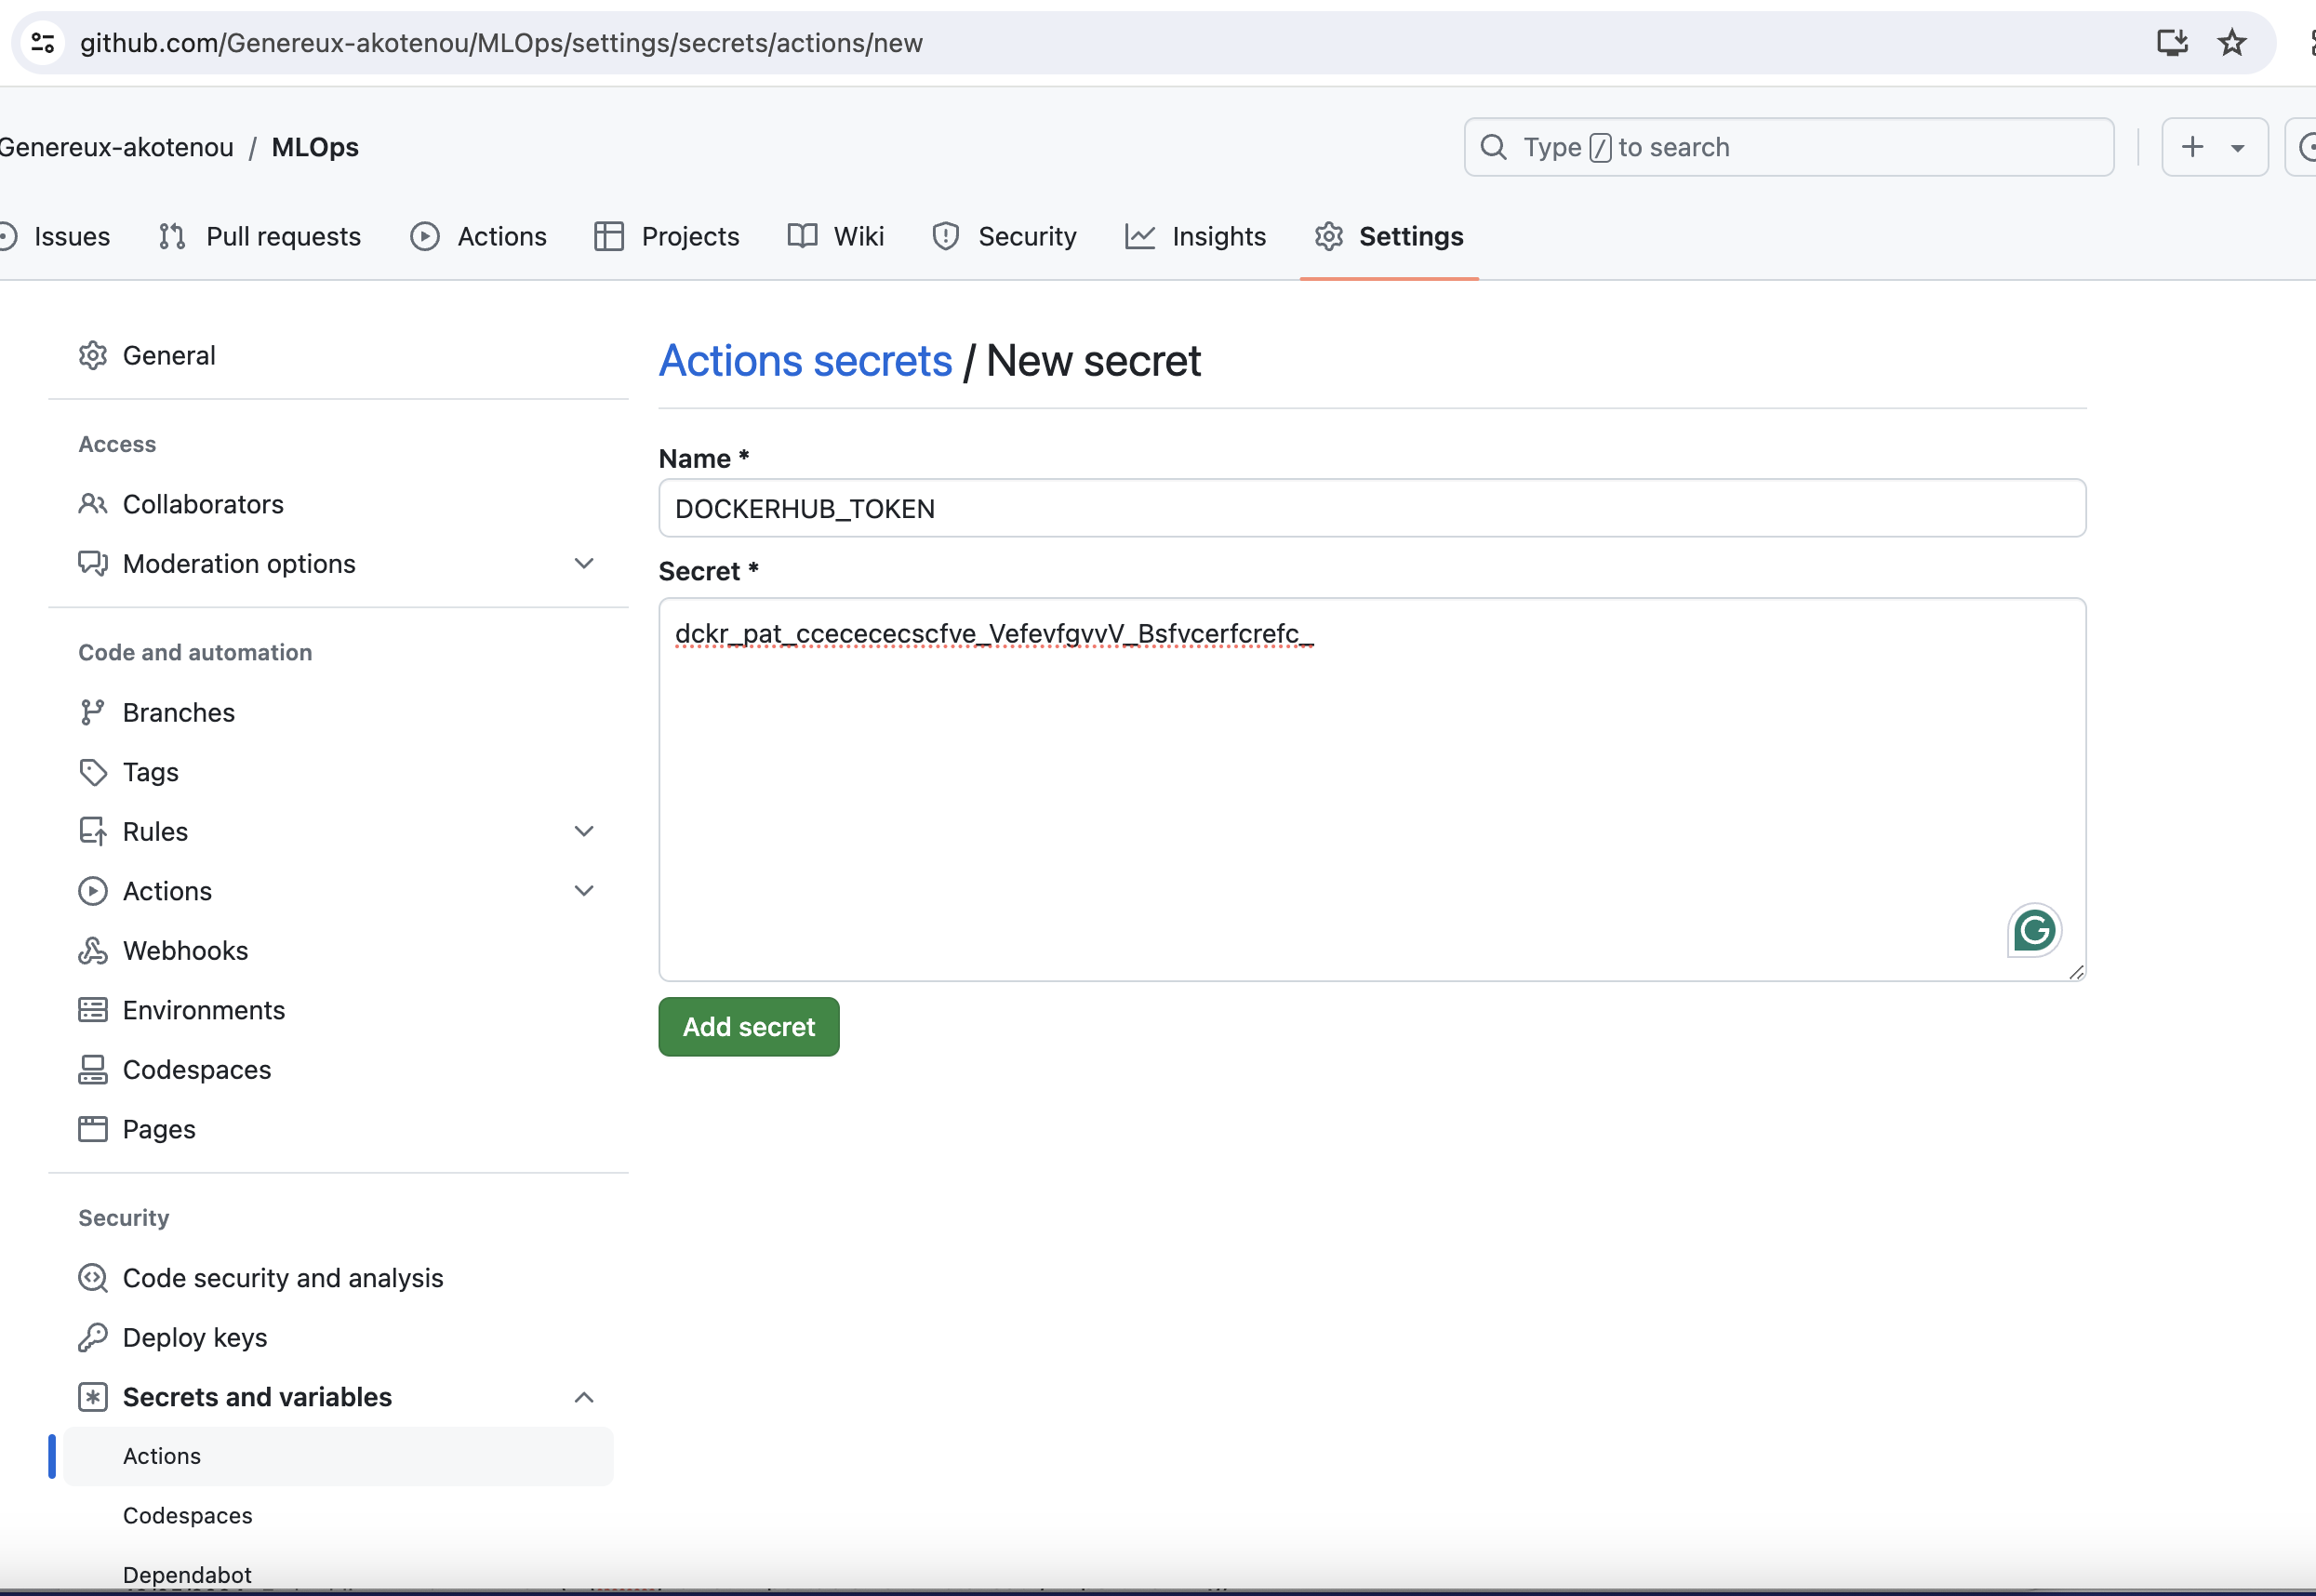

* SAME FOR 'DOCKERHUB_USERNAME'

#### Creating the GitHub Actions Workflow

* In the root directory of your repository, create a new directory called .github/workflows
* Inside the .github/workflows directory, create a new file called build.yml
* Open build.yml in a text editor and add the following code:

name: Build Docker Containers

on:
  push:
    branches:
      - main
    tags:
      - '*deploy-api*'
      - '*deploy-front*'

jobs:
  build-and-push:
    runs-on: ubuntu-latest
    steps:
      - name: Set up QEMU
        uses: docker/setup-qemu-action@v2

      - name: Set up Docker Buildx
        uses: docker/setup-buildx-action@v2

      - name: Checkout repository
        uses: actions/checkout@v3

      - name: Login to Docker Hub
        uses: docker/login-action@v2
        with:
          username: ${{ secrets.DOCKERHUB_USERNAME }}
          password: ${{ secrets.DOCKERHUB_TOKEN }}

      - name: Build and push backend image
        if: contains(github.event.head_commit.message, 'deploy-api')
        uses: docker/build-push-action@v4
        with:
          context: week2/2-labs/02-Action-In-Action/backend
          push: true
          tags: ${{ secrets.DOCKERHUB_USERNAME }}/catdog-api:latest

      - name: Build and push frontend image
        if: contains(github.event.head_commit.message, 'deploy-front')
        uses: docker/build-push-action@v4
        with:
          context: week2/2-labs/02-Action-In-Action/frontend
          push: true
          tags: ${{ secrets.DOCKERHUB_USERNAME }}/catdog-frontend:latest